In [1]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise

In [2]:
def plot_figure(images: list, titles: list, rows: int, columns: int, fig_width=15, fig_height=7):
    fig = plt.figure(figsize=(fig_width, fig_height))
    count = 1
    for image, title in zip(images, titles):
        fig.add_subplot(rows, columns, count)
        count += 1
        plt.imshow(image, 'gray')
        plt.axis('off')
        plt.title(title)

# Problem 1

## .i

#### Read the image "bridge.gif". Filter the images using the masks of of 3x3, 5x5 and 7x7.

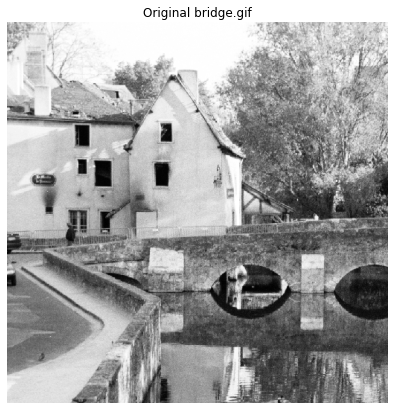

In [3]:
# Read the image and display it
image_name = "bridge.gif"
image = np.array(Image.open(image_name))
plot_figure([image], [f'Original {image_name}'], 1, 1)

In [4]:
# median filters
mask_3x3 = np.ones((3, 3))/9
mask_5x5 = np.ones((5, 5))/25
mask_7x7 = np.ones((7, 7))/49

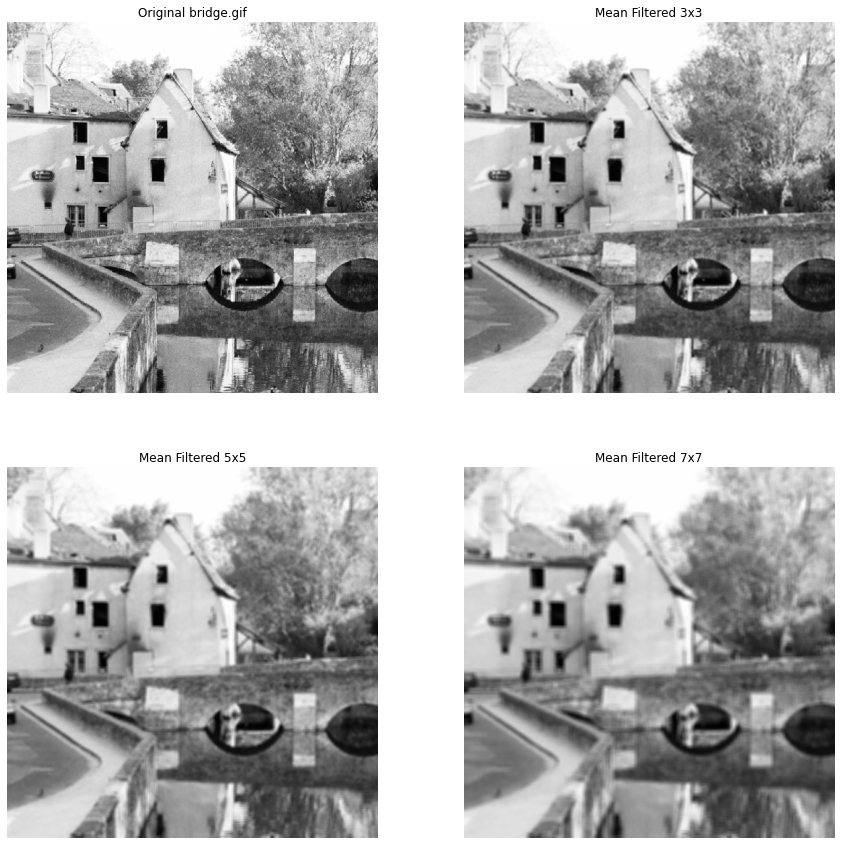

In [5]:
# convolve the filters through the image
output_3x3 = cv2.filter2D(image, -1, mask_3x3)
output_5x5 = cv2.filter2D(image, -1, mask_5x5)
output_7x7 = cv2.filter2D(image, -1, mask_7x7)

plot_figure([image, output_3x3, output_5x5, output_7x7],
            [f'Original {image_name}', 'Mean Filtered 3x3', 'Mean Filtered 5x5', 'Mean Filtered 7x7'],
            2, 2, 15, 15)

#### How does the size of the mask affect blurring and noise reduction?

- The **bigger** the filter, the **blurrier** and **smoother** the image. **Bigger low pass** filters reduce the noise more than smaller filters.


#### Which do you think provides a better tradeoff between blurring and noise reduction for this image?

- The trade-off is between long exposures that reduce the noise at the cost of increasing the blur, and short exposures that reduce the blur at the cost of increasing the noise. Often there is no satisfactory compromise, and the captured image is inevitably too blurry or too noisy. For this image, I believe the 3x3 filter is more satisfying.
 

## .ii

#### Sharpen the 3x3 blurred image by convolving with the Laplacian mask.

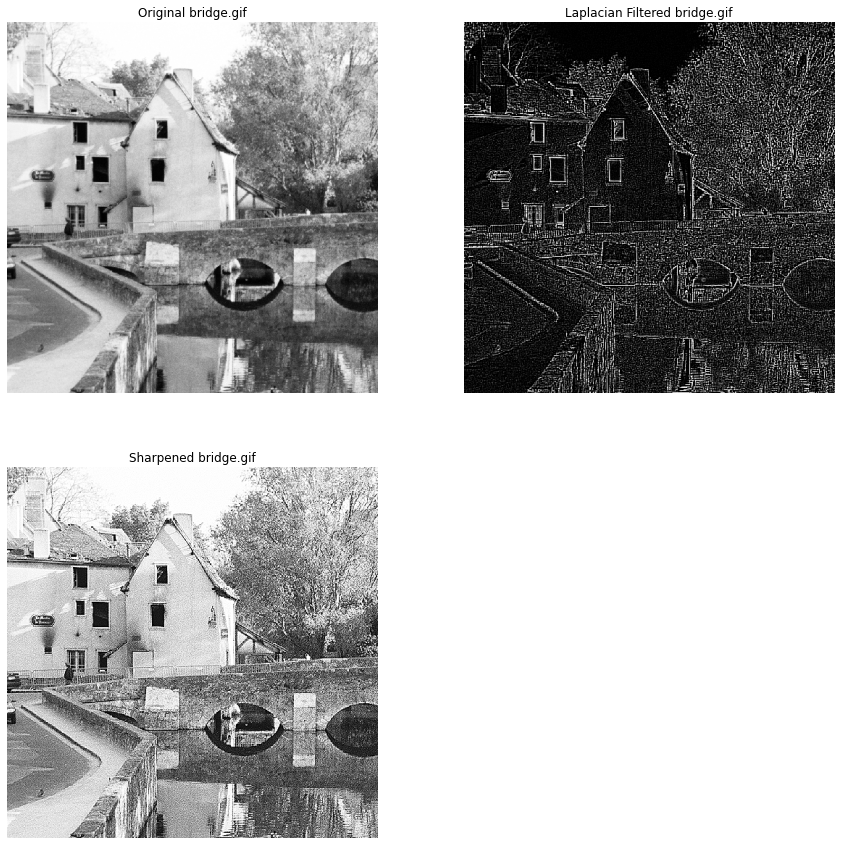

In [6]:
laplacian_mask = np.array(([0, -1, 0], [-1, 5, -1], [0, -1, 0]))
laplacian_filtered_image = cv2.Laplacian(image, -1, ksize=3)
sharpened_image = cv2.filter2D(image, -1, laplacian_mask)

plot_figure([image, laplacian_filtered_image, sharpened_image],
            [f'Original {image_name}', f'Laplacian Filtered {image_name}', f'Sharpened {image_name}'],
            2, 2, 15, 15)

#### Does this operation reduce the blurring? What about the original noise?

- Yes, it reduces the blurring, but it usually enhances the original noise appearance.

## .iii

#### Apply a second sharpening step as in (ii). Would repeated sharpening help image interpretation?

- It increases the noise of the sharpened image.

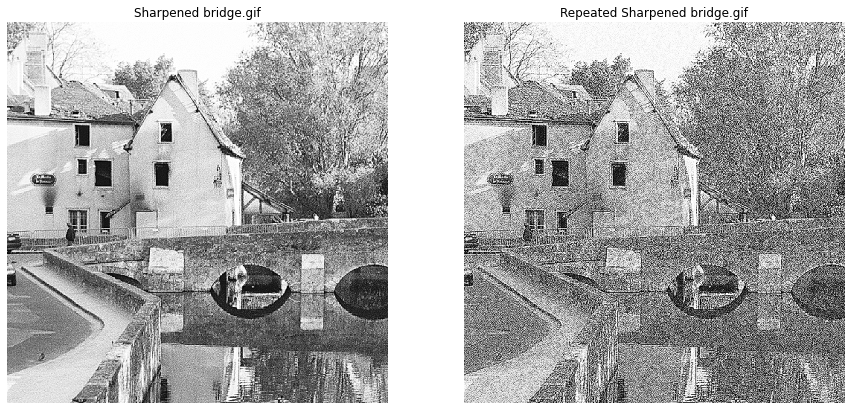

In [7]:
repeated_sharpened_image = cv2.filter2D(sharpened_image, -1, laplacian_mask)
plot_figure([sharpened_image, repeated_sharpened_image],
            [f'Sharpened {image_name}', f'Repeated Sharpened {image_name}'],
            1, 2)

# Problem 2

#### In this problem you will develop and test a 2-D median filtering algorithm. 

#### a) Develop a 2-D median filtering algorithm. Do not use the inbuilt 1D/2D median filter functions from python or Matlab. Draw a block diagram explaining the filtering algorithm.

In [8]:
def median_filter(data, filter_size):
    temp = []
    indexer = filter_size // 2
    data_final = []
    data_final = np.zeros((len(data),len(data[0])))
    for i in range(len(data)):
        for j in range(len(data[0])):
            for z in range(filter_size):
                if i + z - indexer < 0 or i + z - indexer > len(data) - 1:
                    for c in range(filter_size):
                        temp.append(0)
                else:
                    if j + z - indexer < 0 or j + indexer > len(data[0]) - 1:
                        temp.append(0)
                    else:
                        for k in range(filter_size):
                            temp.append(data[i + z - indexer][j + k - indexer])

            temp.sort()
            data_final[i][j] = temp[len(temp) // 2]
            temp = []
    return data_final

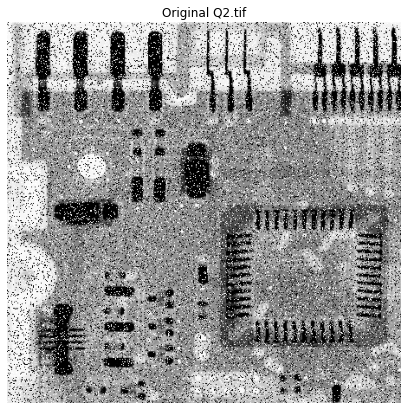

In [9]:
image_name = "Q2.tif"
image = np.array(Image.open(image_name))

plot_figure([image],
            [f'Original {image_name}'],
            1, 1)

#### b) Use your median filter for filtering the image "Q2.tif" in the following cases :
#### • Median filtering performed with a 3 ⇥3 mask
#### • Median filtering performed with a 7 ⇥7 mask
#### • Median filtering performed with a 15 ⇥ 15 mask

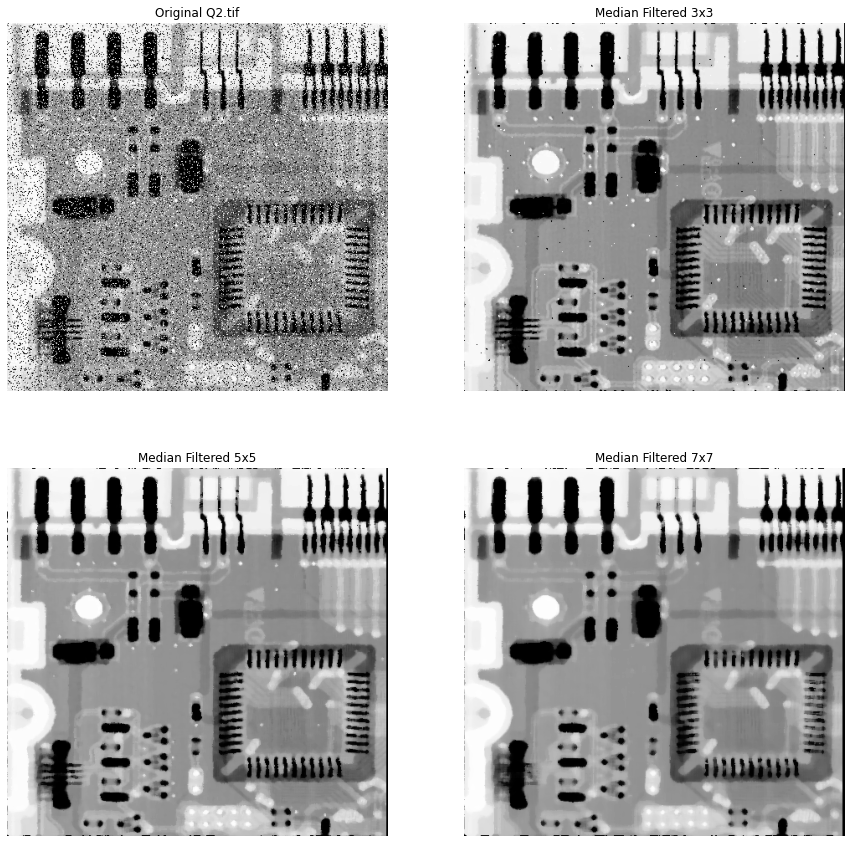

In [10]:
median_3x3_image = median_filter(image, 3)
median_5x5_image = median_filter(image, 5)
median_7x7_image = median_filter(image, 7)

plot_figure([image, median_3x3_image, median_5x5_image, median_7x7_image],
            [f'Original {image_name}', 'Median Filtered 3x3', 'Median Filtered 5x5', 'Median Filtered 7x7'],
            2, 2, 15, 15)

# Problem 3

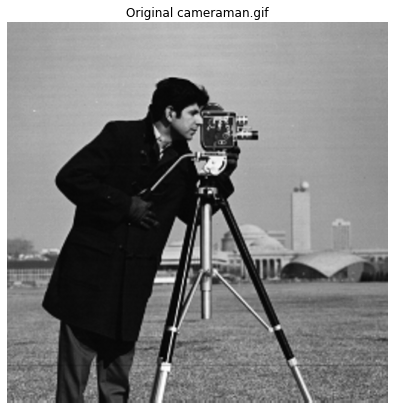

In [11]:
image_name = "cameraman.gif"
image = np.array(Image.open(image_name))
plot_figure([image], [f'Original {image_name}'], 1, 1)

#### a) Compute and display the gradient images using

#### i. Robert cross-gradient operators

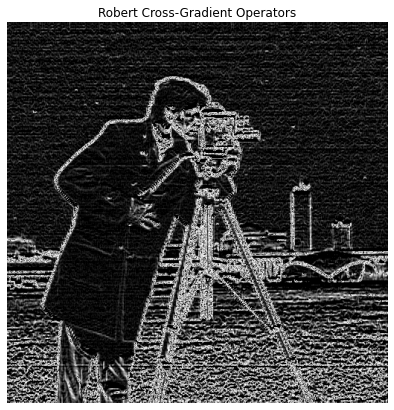

In [12]:
roberts_cross_v = np.array([[1, 0], [0, -1]])
roberts_cross_h = np.array([[0, 1], [-1, 0]])

vertical = cv2.filter2D(image, -1, roberts_cross_v)
horizontal = cv2.filter2D(image, -1, roberts_cross_h)

robert_edged_image = np.sqrt(np.square(horizontal) + np.square(vertical))
robert_edged_image = robert_edged_image.astype(np.uint8)

plot_figure([robert_edged_image], ['Robert Cross-Gradient Operators'], 1, 1)

#### ii. Sobel operators

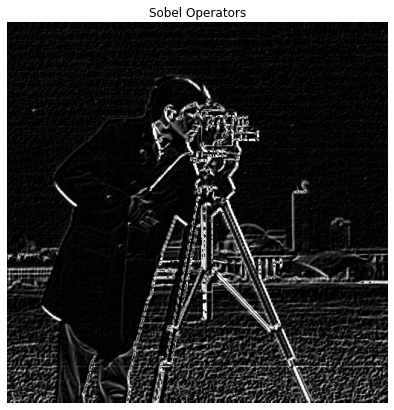

In [13]:
sobel_x = cv2.Sobel(image, -1, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, -1, 0, 1, ksize=3)
sobel_edged_image = sobel_x + sobel_y
plot_figure([sobel_edged_image], ['Sobel Operators'], 1, 1)

#### Are the two images the same?

- No, they are not the same. **Robert cross-gradient** operators detected more ticker edges than the **Sobel** operators. Buildings located in the back or the details of the cameraman's coat are more visible in the **Robert cross-gradient** image.

#### Compute and display the absolute difference between the two images obtained.
#### What can you tell? Explain your observation(s)

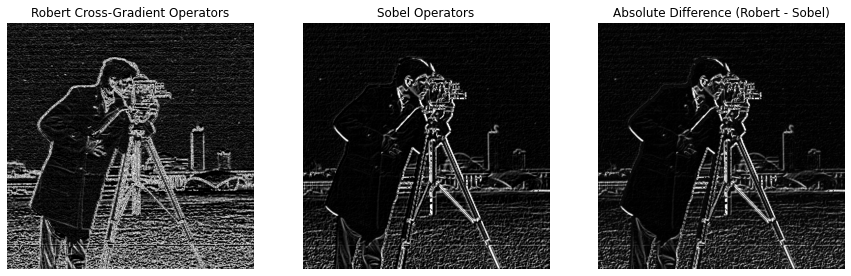

In [14]:
robert_difference_sobel = cv2.absdiff(robert_edged_image, sobel_edged_image)
plot_figure(
    [robert_edged_image, sobel_edged_image, robert_difference_sobel],
    ['Robert Cross-Gradient Operators', 'Sobel Operators', 'Absolute Difference (Robert - Sobel)'],
    1, 3)

The absolute difference is much closer to the edges detected with **sobel** operators.

#### b) Compute and display the gradient images using

#### i. Prewitt operators

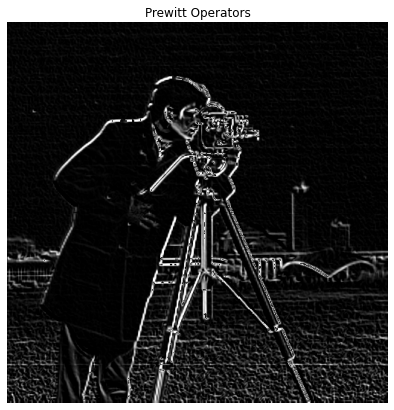

In [15]:
prewitt_x = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
prewitt_y = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

prewitt_x_image = cv2.filter2D(image, -1, prewitt_x)
prewitt_y_image = cv2.filter2D(image, -1, prewitt_y)
prewitt_edged_image = prewitt_x_image + prewitt_y_image

plot_figure([prewitt_edged_image], ['Prewitt Operators'], 1, 1)

#### ii. Sobel operators

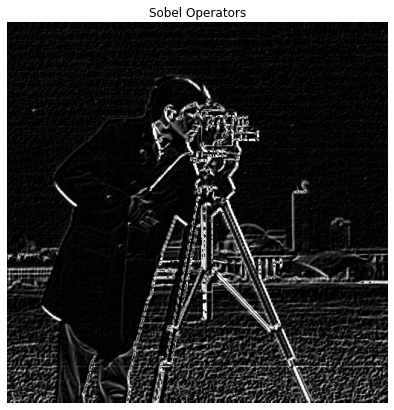

In [16]:
sobel_x = cv2.Sobel(image, -1, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, -1, 0, 1, ksize=3)
sobel_edged_image = sobel_x + sobel_y
plot_figure([sobel_edged_image], ['Sobel Operators'], 1, 1)

#### Are the two images the same?

- No, they are not the same. **Sobel** edge operators detected more edges than **Prewitt** operators. **Sobel** detected more visible edges in the face of the cameraman.

#### Compute and display the absolute difference between the two images obtained.
#### What can you tell? Explain your observation(s)

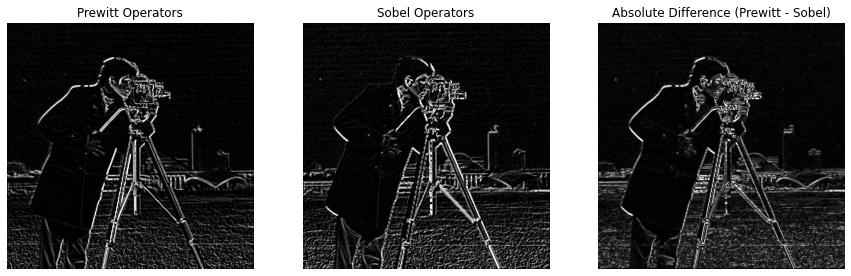

In [17]:
prewitt_difference_sobel = cv2.absdiff(prewitt_edged_image, sobel_edged_image)
plot_figure(
    [prewitt_edged_image, sobel_edged_image, prewitt_difference_sobel],
    ['Prewitt Operators', 'Sobel Operators', 'Absolute Difference (Prewitt - Sobel)'],
    1, 3)

# Problem 4

#### Use an image of your choice to demonstrate the effect of repeatedly applying a 3x3 low-pass spatial filter to a digital image.

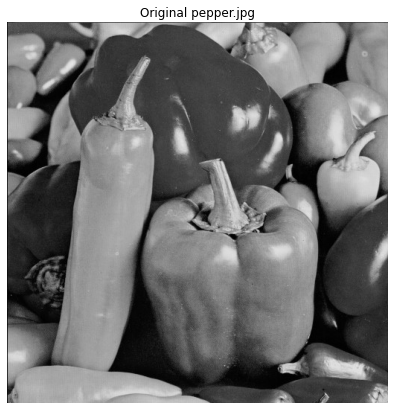

In [18]:
image_name = "pepper.jpg"
image = np.array(Image.open(image_name))
plot_figure([image], [f'Original {image_name}'], 1, 1)

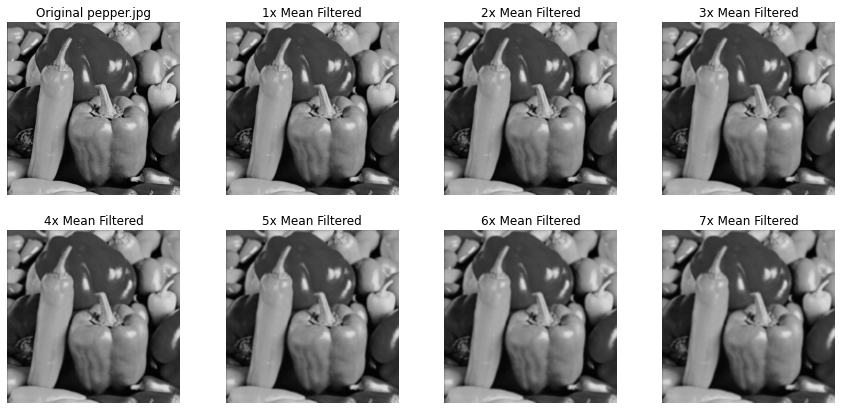

In [19]:
mask_3x3 = np.ones((3, 3))/9

mean_1x = cv2.filter2D(image, -1, mask_3x3)
mean_2x = cv2.filter2D(mean_1x, -1, mask_3x3)
mean_3x = cv2.filter2D(mean_2x, -1, mask_3x3)
mean_4x = cv2.filter2D(mean_3x, -1, mask_3x3)
mean_5x = cv2.filter2D(mean_4x, -1, mask_3x3)
mean_6x = cv2.filter2D(mean_5x, -1, mask_3x3)
mean_7x = cv2.filter2D(mean_6x, -1, mask_3x3)

plot_figure([image, mean_1x, mean_2x, mean_3x, mean_4x, mean_5x, mean_6x, mean_7x],
            [
                f'Original {image_name}',
                '1x Mean Filtered',
                '2x Mean Filtered',
                '3x Mean Filtered',
                '4x Mean Filtered',
                '5x Mean Filtered',
                '6x Mean Filtered',
                '7x Mean Filtered',
            ],
            2, 4)

Repeatedly applying a 3x3 low-pass spatial filter on a digital image makes it blurrier and smoother.

#### Repeat previous operation for a 3*3 median filter. What is the effect (for this opeartion add salt and pepper noise with pb=0.2 to the image pepper.jpg.)?

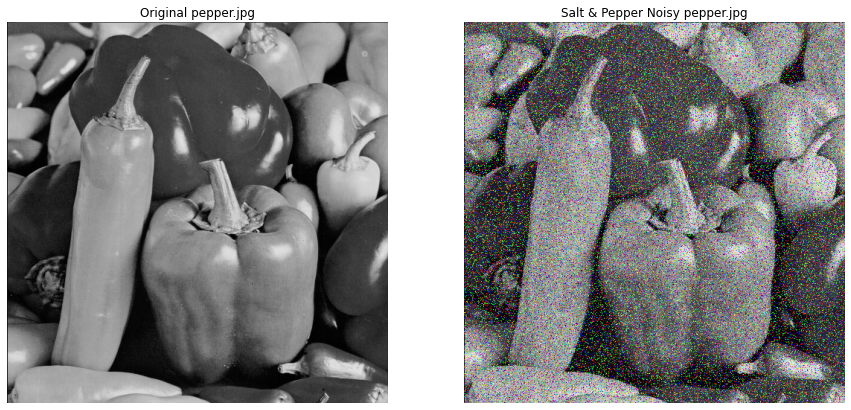

In [20]:
noise_image = random_noise(image, mode='s&p', amount=0.2)
# The above function returns a floating-point image
# on the range [0, 1], thus we changed it to 'uint8'
# and from [0,255]
noise_image = np.array(255*noise_image, dtype='uint8')

plot_figure([image, noise_image], [f'Original {image_name}', f'Salt & Pepper Noisy {image_name}'], 1, 2)

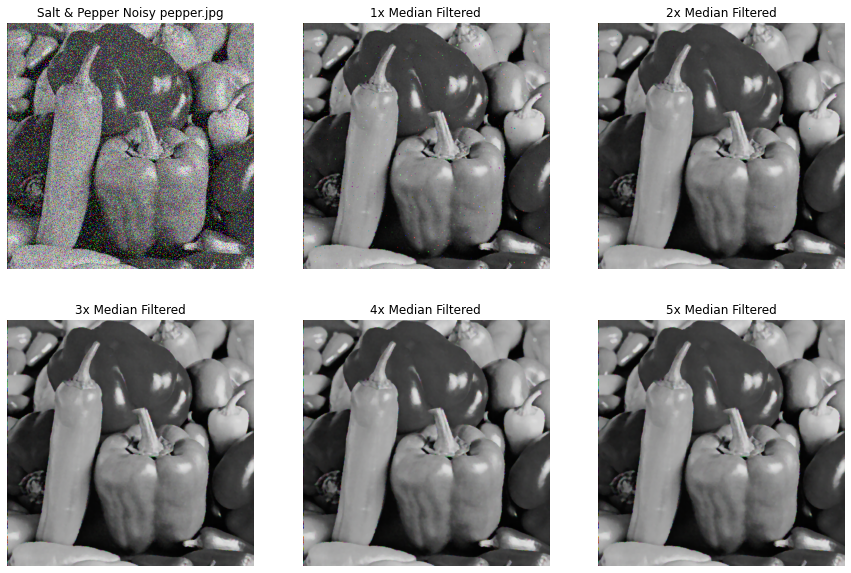

In [21]:
median_1x = cv2.medianBlur(noise_image, 3)
median_2x = cv2.medianBlur(median_1x, 3)
median_3x = cv2.medianBlur(median_2x, 3)
median_4x = cv2.medianBlur(median_3x, 3)
median_5x = cv2.medianBlur(median_4x, 3)


plot_figure([noise_image, median_1x, median_2x, median_3x, median_4x, median_5x],
            [
                f'Salt & Pepper Noisy {image_name}',
                '1x Median Filtered',
                '2x Median Filtered',
                '3x Median Filtered',
                '4x Median Filtered',
                '5x Median Filtered'
            ],
            2, 3, 15, 10)

It is evident that the noise is reduced after repeatedly applying the **Median** filter on the noisy image.